In [1]:
import pandas as pd
import numpy as np
import ast
import collections as c
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
convs=pd.read_csv('../data/bbAllFullConvos.csv',sep=';')

/home/mako0970/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (37,38,39,41,42,43,45,46,47,49,50,51,53,54,55,57,58,59,61,62,63,65,66,67,69,70,71,73,74,75,77,78,79,81,82,83,85,86,87,89,90,91,93,94,95,97,98,99,101,102,103,105,106,107,109,110,111,113,114,115,117,118,119,121,122,123,125,126,127,129,130,131,133,134,135,137,138,139,141,142,143,145,146,147,149,150,151,153,154,155,157,158,159,161,162,163,165,166,167,169,170,171,173,174,175) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
convs['convoLen']=(pd.to_datetime(convs.convoEndTime)-pd.to_datetime(convs.date0)).apply(lambda x: x.item()/(10**9))

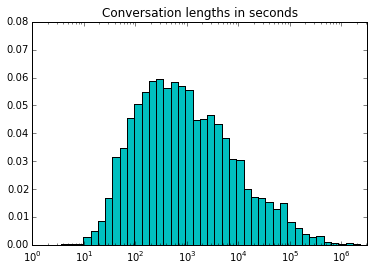

In [5]:
convoLen = convs.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Conversation lengths in seconds')

In [6]:
np.median(convoLen)

733.0

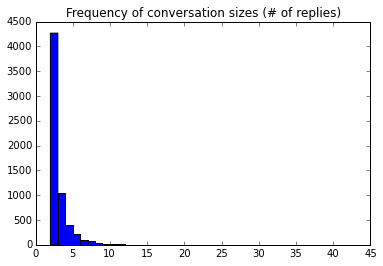

In [7]:
plt.hist(convs.convSize,42)
plt.title('Frequency of conversation sizes (# of replies)')

In [25]:
np.median(convs.convSize)

2.0

In [8]:
convs.allNames=convs.allNames.apply(lambda x: ast.literal_eval(x))

In [9]:
convs['userSetLen']=convs.allNames.apply(lambda x: len(x))

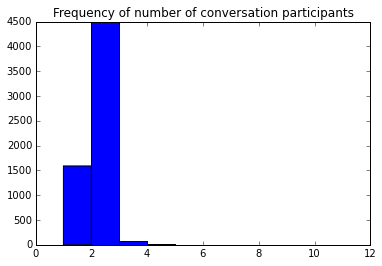

In [10]:
plt.hist(convs.userSetLen,10)
plt.title('Frequency of number of conversation participants')

In [26]:
np.median(convs.userSetLen)

2.0

In [38]:
max(convs.userSetLen)

11

In [11]:
convs['avgTimePerReply']=convs.convoLen/convs.convSize

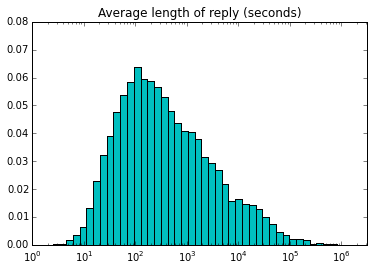

In [27]:
avgTime=convs.avgTimePerReply.dropna().tolist()
bins=np.logspace(0, int(np.log(max(avgTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(avgTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Average length of reply (seconds)')

In [28]:
np.median(avgTime)

284.0

In [15]:
before=convs[pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-10-27 00:00:00')]

In [16]:
during=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-27 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<=pd.to_datetime('2012-11-04 11:59:59'))]

In [17]:
after=convs[pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-05 00:00:00')]

In [18]:
len(before)

1211

In [19]:
len(during)

1926

In [20]:
len(after)

2878

In [22]:
len(before)+len(during)+len(after)

6015

162 conversations don't fit these time periods - span more than one

# Before

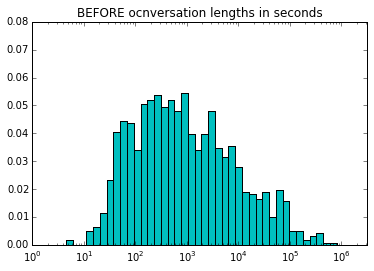

In [23]:
bConvoLen=before.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(bConvoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(bConvoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title(('BEFORE ocnversation lengths in seconds'))

In [24]:
np.median(bConvoLen)

701.0

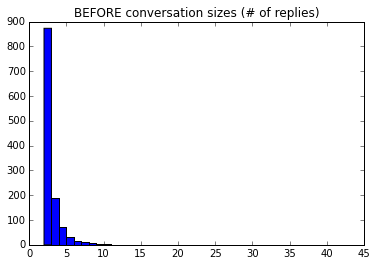

In [29]:
plt.hist(before.convSize,39)
plt.title('BEFORE conversation sizes (# of replies)')

In [30]:
np.median(before.convSize)

2.0

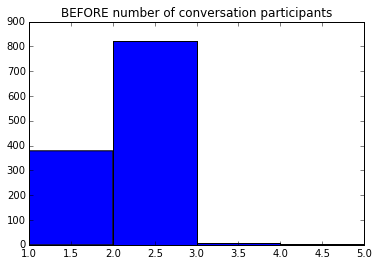

In [36]:
plt.hist(before.userSetLen,4)
plt.title('BEFORE number of conversation participants')

In [37]:
np.median(before.userSetLen)

2.0

In [39]:
max(before.userSetLen)

5

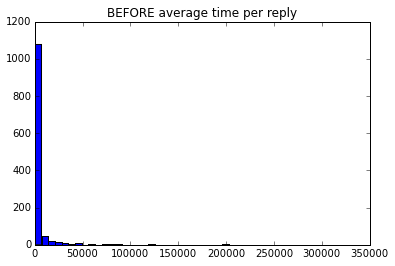

In [40]:
plt.hist(before.avgTimePerReply, 50)
plt.title('BEFORE average time per reply')

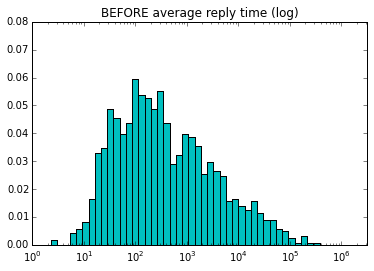

In [42]:
bAvgRepTime=before.avgTimePerReply.dropna().tolist()
bins=np.logspace(0, int(np.log(max(bAvgRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(bAvgRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('BEFORE average reply time (log)')

Or should it plot on the loglog? Checked it - not interesting, not high enough

In [44]:
np.median(bAvgRepTime)

269.5

# During

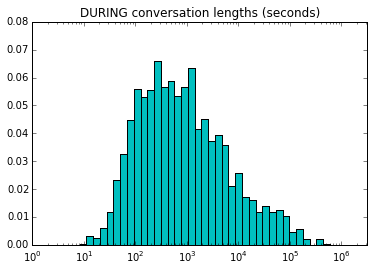

In [45]:
dConvoLen=during.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(dConvoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(dConvoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('DURING conversation lengths (seconds)')

In [47]:
np.median(dConvoLen)

677.5

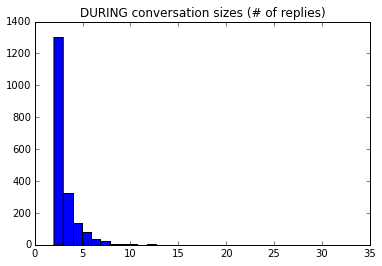

In [55]:
plt.hist(during.convSize.tolist(),33)
plt.title('DURING conversation sizes (# of replies)')

In [56]:
np.median(during.convSize)

2.0

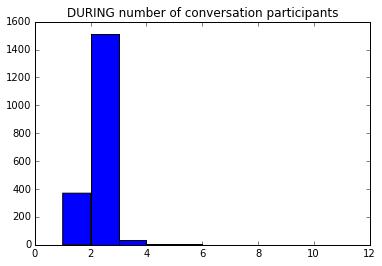

In [60]:
plt.hist(during.userSetLen.tolist(),10)
plt.title('DURING number of conversation participants')

In [61]:
np.median(during.userSetLen)

2.0

In [59]:
max(during.userSetLen)

11

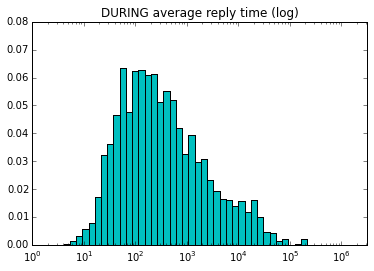

In [62]:
dAvgRepTime=during.avgTimePerReply.dropna().tolist()
bins=np.logspace(0, int(np.log(max(dAvgRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(dAvgRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('DURING average reply time (log)')

In [63]:
np.median(dAvgRepTime)

256.16666666666669

Represent the medians for the convoLen and avgReplyTime as boxplots? This is local only, include both local and global?

# After

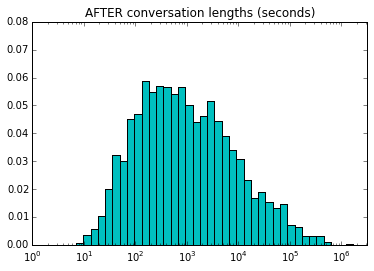

In [64]:
aConvoLen=after.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(aConvoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(aConvoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('AFTER conversation lengths (seconds)')

In [65]:
np.median(aConvoLen)

782.0

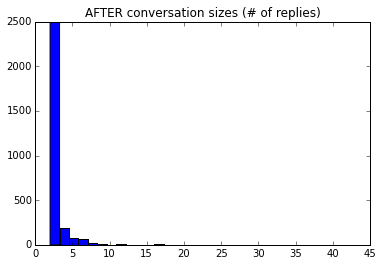

In [66]:
plt.hist(after.convSize.tolist(),33)
plt.title('AFTER conversation sizes (# of replies)')

In [67]:
np.median(after.convSize.tolist())

2.0

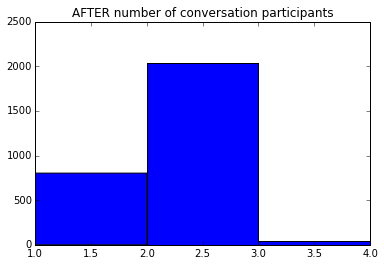

In [69]:
plt.hist(after.userSetLen.tolist(),3)
plt.title('AFTER number of conversation participants')

In [70]:
np.median(after.userSetLen)

2.0

In [71]:
max(after.userSetLen)

4

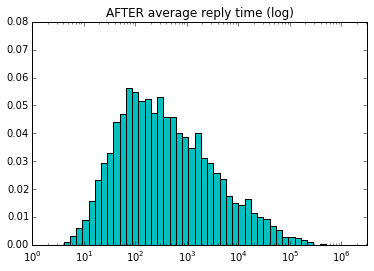

In [72]:
aAvgRepTime=after.avgTimePerReply.dropna().tolist()
bins=np.logspace(0, int(np.log(max(aAvgRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(aAvgRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('AFTER average reply time (log)')

In [73]:
np.median(aAvgRepTime)

305.25